# Classification of Scenarioes - June 2023

This work aims at creating a multiclassification model to predict the emissions classiication of scenarioes from the GGM based on the AR6 DataSet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [3]:
# read the dataset that has demand, emissions and classification categories
df = pd.read_csv('emissionseries_emissions_cat_merged_24August2022.csv')

In [4]:
df.head()

,Unnamed: 0,Model,Scenario,Region,Variable,Unit,2019,2020,2021,2022,...,2093,2094,2095,2096,2097,2098,2099,2100,Category,Category_name
0,0,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|BC,Mt BC/yr,8.130643,7.738276,7.503108,7.269501,...,2.022680,2.007340,1.992000,1.976660,1.961320,1.945980,1.930640,1.915300,C3,C3: limit warming to 2°C (>67%)
1,1,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,382.198514,380.730719,365.470232,350.213054,...,117.482740,116.862420,116.242100,115.621780,115.001460,114.381140,113.760820,113.140500,C3,C3: limit warming to 2°C (>67%)
2,2,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|CO,Mt CO/yr,855.912547,836.364378,821.034217,805.723117,...,347.671325,344.756572,341.845444,338.937940,336.034060,333.133803,330.237171,327.344163,C3,C3: limit warming to 2°C (>67%)
3,3,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|CO2,Mt CO2/yr,37800.549767,37462.666746,36683.892311,35905.865479,...,-188.421413,-238.245789,-288.070164,-337.894539,-387.718914,-437.543289,-487.367665,-537.192040,C3,C3: limit warming to 2°C (>67%)
4,4,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|C...,Mt CO2/yr,2439.280541,2169.740677,1878.426691,1587.112706,...,-3480.564713,-3471.886089,-3463.207464,-3454.528839,-3445.850214,-3437.171589,-3428.492965,-3419.814340,C3,C3: limit warming to 2°C (>67%)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23411 entries, 0 to 23410
Data columns (total 90 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     23411 non-null  int64  
 1   Model          23411 non-null  object 
 2   Scenario       23411 non-null  object 
 3   Region         23411 non-null  object 
 4   Variable       23411 non-null  object 
 5   Unit           23411 non-null  object 
 6   2019           23411 non-null  float64
 7   2020           23411 non-null  float64
 8   2021           23411 non-null  float64
 9   2022           23411 non-null  float64
 10  2023           23411 non-null  float64
 11  2024           23411 non-null  float64
 12  2025           23411 non-null  float64
 13  2026           23411 non-null  float64
 14  2027           23411 non-null  float64
 15  2028           23411 non-null  float64
 16  2029           23411 non-null  float64
 17  2030           23411 non-null  float64
 18  2031  

In [6]:
df.isnull().sum()

Unnamed: 0          0
Model               0
Scenario            0
Region              0
Variable            0
                 ... 
2098                0
2099                0
2100                0
Category         1708
Category_name    1708
Length: 90, dtype: int64

In [7]:
df.columns

Index(['Unnamed: 0', 'Model', 'Scenario', 'Region', 'Variable', 'Unit', '2019',
       '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028',
       '2029', '2030', '2031', '2032', '2033', '2034', '2035', '2036', '2037',
       '2038', '2039', '2040', '2041', '2042', '2043', '2044', '2045', '2046',
       '2047', '2048', '2049', '2050', '2051', '2052', '2053', '2054', '2055',
       '2056', '2057', '2058', '2059', '2060', '2061', '2062', '2063', '2064',
       '2065', '2066', '2067', '2068', '2069', '2070', '2071', '2072', '2073',
       '2074', '2075', '2076', '2077', '2078', '2079', '2080', '2081', '2082',
       '2083', '2084', '2085', '2086', '2087', '2088', '2089', '2090', '2091',
       '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099', '2100',
       'Category', 'Category_name'],
      dtype='object')

In [11]:
# it seems that the category column, the one of interest has a missing data, it should be removed. 

In [8]:
df_clean = df.dropna()

In [9]:
df.shape

(23411, 90)

In [10]:
df_clean.shape

(21703, 90)

In [11]:
# lets check that the emissions category column is full of all categorties (C1 to C8)
df_clean['Category'].unique().tolist()

['C3', 'C5', 'C6', 'C7', 'C4', 'C1', 'C2', 'C8']

Now, we are sure that the emissions category column ['Category'] has the 8 categories. Lets check the distributions of data points in this column. 

In [12]:
df_clean['Category'].value_counts()

C3    5480
C5    3859
C7    3049
C4    2817
C2    2393
C6    1801
C1    1677
C8     627
Name: Category, dtype: int64

<AxesSubplot:>

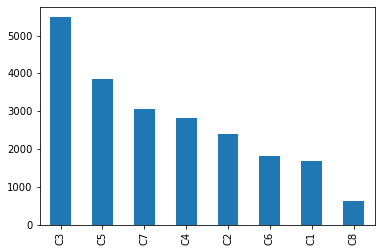

In [13]:
df_clean['Category'].value_counts().plot(kind = 'bar')

C8 is the least represented in the dataset. It can be omitted as it showsn scenarioes of very high emisisons and warming potential. 
Bu we can leave it and try the classification model with it and without it. 

## Re-arranging the dataset

The dataset is presented with time columns. However, we need the features as columns. Features for the classification of the global warming potential of scenarioes include GHG emissions, CO2 emisisons, energy demand (oil, gas, coal, renewables), and carbon removal technology scale. 

The dataset should be restructured to represent these features as column to start feature engineering of the dataset. 

In [14]:
# shorten the dataset into a shorter version with the values of interest
##NOTE: the dataset is on Global basis - the region is always 'World'

df_clean = df_clean[['Model', 'Scenario', 'Variable', 'Unit','2030', '2040', '2050', 'Category']]



In [15]:
df_clean.head()

,Model,Scenario,Variable,Unit,2030,2040,2050,Category
0,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|BC,Mt BC/yr,5.456829,4.237396,3.337359,C3
1,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,228.274770,172.269750,151.312704,C3
2,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CO,Mt CO/yr,683.920550,585.632065,499.384203,C3
3,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CO2,Mt CO2/yr,29708.564518,18913.013818,12965.258478,C3
4,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|C...,Mt CO2/yr,-743.399175,-2306.007528,-2857.468480,C3


In [16]:
# convert df_clean into long format

df_l = df_clean.melt(id_vars = ['Model', 'Scenario', 'Variable', 'Unit', 'Category'],
                                    value_vars = ['2030', '2040','2050'],
                                    var_name = 'Year',
                                    value_name = 'Variable_Value')

In [17]:
# convert the long formate into a pivot formate with the variables at each year is a column
df_l.head()

,Model,Scenario,Variable,Unit,Category,Year,Variable_Value
0,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|BC,Mt BC/yr,C3,2030,5.456829
1,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,C3,2030,228.274770
2,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CO,Mt CO/yr,C3,2030,683.920550
3,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CO2,Mt CO2/yr,C3,2030,29708.564518
4,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|C...,Mt CO2/yr,C3,2030,-743.399175


In [18]:
# now we need to find a way to get the features take into account the year like emisisons 2030, emissions 2040, ....
## this would require 1] selecting he main features, 2] rearranging the dataset with features at time as columns.

df_l.Variable.unique()

array(['AR6 climate diagnostics|Harmonized|Emissions|BC',
       'AR6 climate diagnostics|Harmonized|Emissions|CH4',
       'AR6 climate diagnostics|Harmonized|Emissions|CO',
       'AR6 climate diagnostics|Harmonized|Emissions|CO2',
       'AR6 climate diagnostics|Harmonized|Emissions|CO2|AFOLU',
       'AR6 climate diagnostics|Harmonized|Emissions|CO2|Energy and Industrial Processes',
       'AR6 climate diagnostics|Harmonized|Emissions|F-Gases',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC125',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC134a',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC143a',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC227ea',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC23',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC32',
       'AR6 climate diagnostics|Harmonized|Emissions|HFC|HFC43-10',
       'AR6 climate diagnostics|Harmonized|Emissions|N2O',
       'AR6 climate di

In [19]:
# choose CH4 and CO2 in the features dataset
df_f = df_l[df_l['Variable'].isin(['AR6 climate diagnostics|Harmonized|Emissions|CH4','AR6 climate diagnostics|Harmonized|Emissions|CO2'])]

In [20]:
df_f

,Model,Scenario,Variable,Unit,Category,Year,Variable_Value
1,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,C3,2030,228.274770
3,AIM/CGE 2.0,SSP1-26,AR6 climate diagnostics|Harmonized|Emissions|CO2,Mt CO2/yr,C3,2030,29708.564518
23,AIM/CGE 2.0,SSP1-34,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,C5,2030,290.698352
25,AIM/CGE 2.0,SSP1-34,AR6 climate diagnostics|Harmonized|Emissions|CO2,Mt CO2/yr,C5,2030,35304.481960
45,AIM/CGE 2.0,SSP1-45,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,C6,2030,379.047509
...,...,...,...,...,...,...,...
65087,WITCH-GLOBIOM 4.4,CD-LINKS_NPi2020_1600,AR6 climate diagnostics|Harmonized|Emissions|CO2,Mt CO2/yr,C3,2050,18776.198777
65094,WITCH-GLOBIOM 4.4,CD-LINKS_NPi2020_400,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,C1,2050,125.048375
65095,WITCH-GLOBIOM 4.4,CD-LINKS_NPi2020_400,AR6 climate diagnostics|Harmonized|Emissions|CO2,Mt CO2/yr,C1,2050,2298.337803
65102,WITCH-GLOBIOM 4.4,CD-LINKS_NoPolicy,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,C7,2050,471.009648


In [23]:
df_f['Variable'].replace({"AR6 climate diagnostics|Harmonized|Emissions|CH4":'CH4-Mt/yr', "AR6 climate diagnostics|Harmonized|Emissions|CO2": 'CO2-Mt/yr'}, inplace=True)


c:\Users\Mustafa Adel\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Consider CO2 and CH4 are the main predictors of emissions to classify scenarioes 

In [28]:
## make the data as columns, 2030, 2040, 2050
df2030 = df_f[df_f['Year']=='2030'].replace({'CH4-Mt/yr':'CH4-2030-Mt/yr', 'CO2-Mt/yr':'CO2-2030Mt/yr'})
df2030 = df2030[['Model','Scenario','Variable','Variable_Value','Category']]
df2030.head()

,Model,Scenario,Variable,Variable_Value,Category
1,AIM/CGE 2.0,SSP1-26,CH4-2030-Mt/yr,228.274770,C3
3,AIM/CGE 2.0,SSP1-26,CO2-2030Mt/yr,29708.564518,C3
23,AIM/CGE 2.0,SSP1-34,CH4-2030-Mt/yr,290.698352,C5
25,AIM/CGE 2.0,SSP1-34,CO2-2030Mt/yr,35304.481960,C5
45,AIM/CGE 2.0,SSP1-45,CH4-2030-Mt/yr,379.047509,C6


In [29]:
## repeat to 2040 and 2050
df2040 = df_f[df_f['Year']=='2040'].replace({'CH4-Mt/yr':'CH4-2040-Mt/yr', 'CO2-Mt/yr':'CO2-2040Mt/yr'})
df2040 = df2040[['Model','Scenario','Variable','Variable_Value','Category']]

df2050 = df_f[df_f['Year']=='2050'].replace({'CH4-Mt/yr':'CH4-2050-Mt/yr', 'CO2-Mt/yr':'CO2-2050Mt/yr'})
df2050 = df2050[['Model','Scenario','Variable','Variable_Value','Category']]

In [30]:
df2050.head()

,Model,Scenario,Variable,Variable_Value,Category
43407,AIM/CGE 2.0,SSP1-26,CH4-2050-Mt/yr,151.312704,C3
43409,AIM/CGE 2.0,SSP1-26,CO2-2050Mt/yr,12965.258478,C3
43429,AIM/CGE 2.0,SSP1-34,CH4-2050-Mt/yr,200.397111,C5
43431,AIM/CGE 2.0,SSP1-34,CO2-2050Mt/yr,26061.047409,C5
43451,AIM/CGE 2.0,SSP1-45,CH4-2050-Mt/yr,388.505211,C6


In [35]:
## merge datasets 

dfx = pd.concat([df2030,df2040, df2050], axis=0)


In [36]:
df_final = pd.pivot_table(dfx, values='Variable_Value', index=['Model', 'Scenario', 'Category'],
                    columns=['Variable'], aggfunc=np.sum)
df_final.head()

Variable                            CH4-2030-Mt/yr  CH4-2040-Mt/yr  \
Model       Scenario      Category                                   
AIM/CGE 2.0 SSP1-26       C3            228.274770      172.269750   
            SSP1-34       C5            290.698352      240.085590   
            SSP1-45       C6            379.047509      448.796851   
            SSP1-Baseline C7            442.730060      471.711604   
            SSP4-26       C3            229.929154      186.151407   

Variable                            CH4-2050-Mt/yr  CO2-2030Mt/yr  \
Model       Scenario      Category                                  
AIM/CGE 2.0 SSP1-26       C3            151.312704   29708.564518   
            SSP1-34       C5            200.397111   35304.481960   
            SSP1-45       C6            388.505211   39655.954971   
            SSP1-Baseline C7            490.708618   42098.155593   
            SSP4-26       C3            173.673817   32846.727488   

Variable                            CO2-2040Mt/yr  CO2-2050Mt/yr  
Model       Scenario      Category                                
AIM/CGE 2.0 SSP1-26       C3         18913.013818   12965.258478  
            SSP1-34       C5         31112.520790   26061.047409  
            SSP1-45       C6         38482.362210   34811.197324  
            SSP1-Baseline C7         42176.638483   40023.059672  
            SSP4-26       C3         20297.394702   13189.644577

In [37]:
df_final.columns = df_final.columns.map(''.join)
df_final.reset_index(inplace = True)


,Unnamed: 0,Model,Scenario,Region,Variable,Unit,2019,2020,2021,2022,...,2093,2094,2095,2096,2097,2098,2099,2100,Category,Category_name
0,0,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|BC,Mt BC/yr,8.130643,7.738276,7.503108,7.269501,...,2.022680,2.007340,1.992000,1.976660,1.961320,1.945980,1.930640,1.915300,C3,C3: limit warming to 2°C (>67%)
1,1,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|CH4,Mt CH4/yr,382.198514,380.730719,365.470232,350.213054,...,117.482740,116.862420,116.242100,115.621780,115.001460,114.381140,113.760820,113.140500,C3,C3: limit warming to 2°C (>67%)
2,2,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|CO,Mt CO/yr,855.912547,836.364378,821.034217,805.723117,...,347.671325,344.756572,341.845444,338.937940,336.034060,333.133803,330.237171,327.344163,C3,C3: limit warming to 2°C (>67%)
3,3,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|CO2,Mt CO2/yr,37800.549767,37462.666746,36683.892311,35905.865479,...,-188.421413,-238.245789,-288.070164,-337.894539,-387.718914,-437.543289,-487.367665,-537.192040,C3,C3: limit warming to 2°C (>67%)
4,4,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Harmonized|Emissions|C...,Mt CO2/yr,2439.280541,2169.740677,1878.426691,1587.112706,...,-3480.564713,-3471.886089,-3463.207464,-3454.528839,-3445.850214,-3437.171589,-3428.492965,-3419.814340,C3,C3: limit warming to 2°C (>67%)


In [38]:
df_final.head()

Variable,Model,Scenario,Category,CH4-2030-Mt/yr,CH4-2040-Mt/yr,CH4-2050-Mt/yr,CO2-2030Mt/yr,CO2-2040Mt/yr,CO2-2050Mt/yr
0,AIM/CGE 2.0,SSP1-26,C3,228.274770,172.269750,151.312704,29708.564518,18913.013818,12965.258478
1,AIM/CGE 2.0,SSP1-34,C5,290.698352,240.085590,200.397111,35304.481960,31112.520790,26061.047409
2,AIM/CGE 2.0,SSP1-45,C6,379.047509,448.796851,388.505211,39655.954971,38482.362210,34811.197324
3,AIM/CGE 2.0,SSP1-Baseline,C7,442.730060,471.711604,490.708618,42098.155593,42176.638483,40023.059672
4,AIM/CGE 2.0,SSP4-26,C3,229.929154,186.151407,173.673817,32846.727488,20297.394702,13189.644577


In [43]:
df_final.columns

Index(['Model', 'Scenario', 'Category', 'CH4-2030-Mt/yr', 'CH4-2040-Mt/yr',
       'CH4-2050-Mt/yr', 'CO2-2030Mt/yr', 'CO2-2040Mt/yr', 'CO2-2050Mt/yr'],
      dtype='object', name='Variable')

Finally the dataset is in a clean and clear format with the features as columns

## Visualization and exploration 

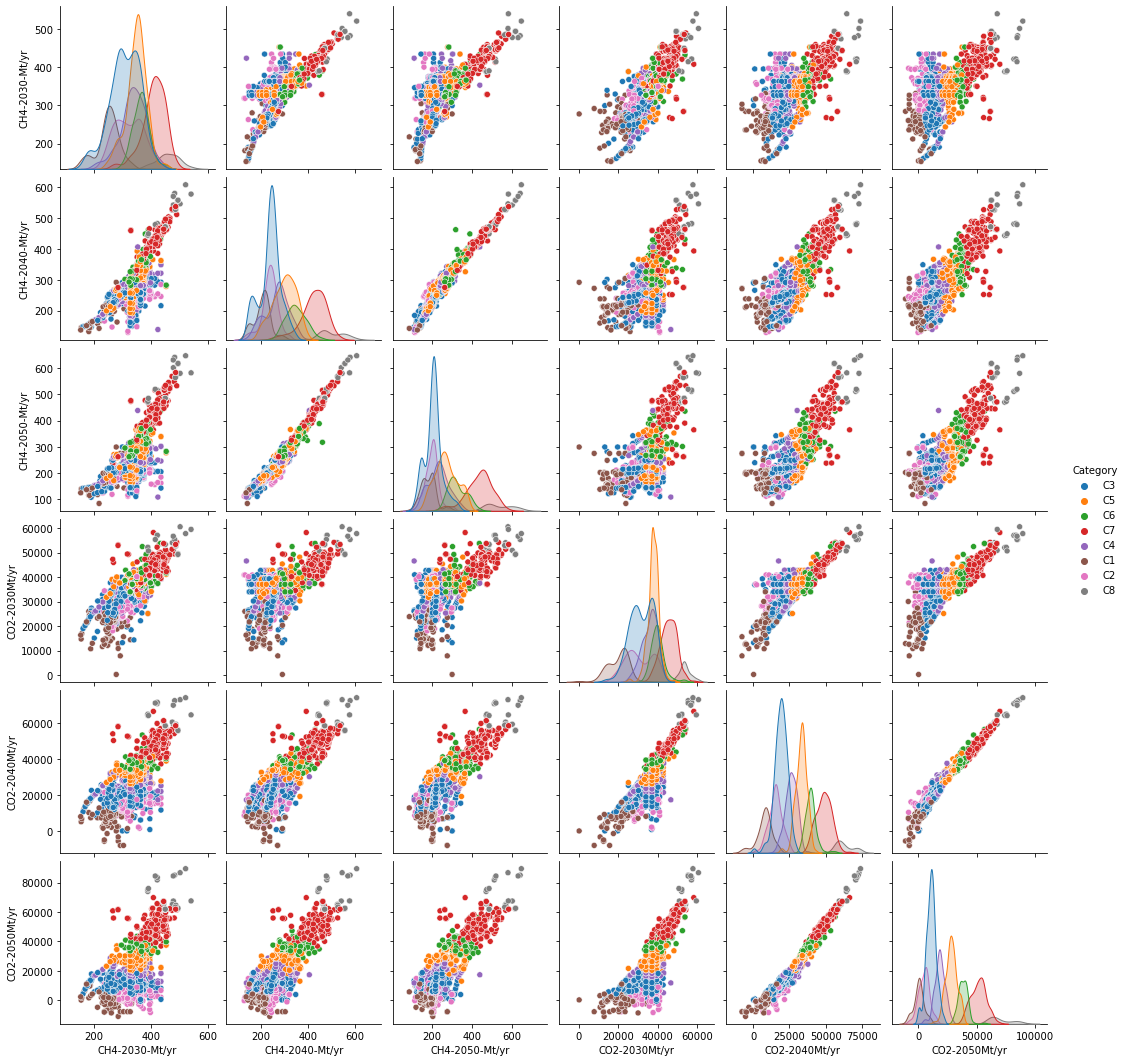

In [40]:

sns.pairplot(df_final, hue='Category');

The data is widely variable and seperable

### KNN classifier 

In [51]:
# Import necessary libraries for classification 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix


In [46]:
X = df_final[['CH4-2030-Mt/yr', 'CH4-2040-Mt/yr','CH4-2050-Mt/yr', 'CO2-2030Mt/yr', 'CO2-2040Mt/yr', 'CO2-2050Mt/yr']]
y = df_final.Category

# Convert string target variable to integers
le = LabelEncoder()
y = le.fit_transform(y)



In [55]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[25  1  2  0  0  0  0  0]
 [ 3 23 11  0  0  0  0  0]
 [ 3  7 74  6  0  0  0  0]
 [ 0  1 12 31  4  0  0  0]
 [ 0  0  1  4 47  7  0  0]
 [ 0  0  0  0  8 21  4  0]
 [ 0  0  0  0  0  4 43  1]
 [ 0  0  0  0  0  0  3  9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.72      0.62      0.67        37
           2       0.74      0.82      0.78        90
           3       0.76      0.65      0.70        48
           4       0.80      0.80      0.80        59
           5       0.66      0.64      0.65        33
           6       0.86      0.90      0.88        48
           7       0.90      0.75      0.82        12

    accuracy                           0.77       355
   macro avg       0.78      0.76      0.77       355
weighted avg       0.77      0.77      0.77       355



In [50]:
# print the mapping of the encoder 
# Print the mapping
for class_index, class_name in enumerate(le.classes_):
    print(f'The string value "{class_name}" was encoded to integer value "{class_index}"')


The string value "C1" was encoded to integer value "0"
The string value "C2" was encoded to integer value "1"
The string value "C3" was encoded to integer value "2"
The string value "C4" was encoded to integer value "3"
The string value "C5" was encoded to integer value "4"
The string value "C6" was encoded to integer value "5"
The string value "C7" was encoded to integer value "6"
The string value "C8" was encoded to integer value "7"


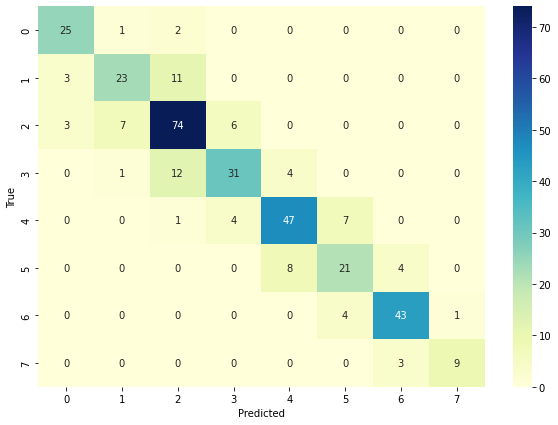

In [56]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Try CART Model 



Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.68      0.71      0.69        24
           2       0.78      0.83      0.80        59
           3       0.80      0.57      0.67        28
           4       0.79      0.94      0.86        36
           5       0.92      0.82      0.87        28
           6       0.88      0.85      0.87        34
           7       0.75      0.82      0.78        11

    accuracy                           0.81       237
   macro avg       0.82      0.80      0.81       237
weighted avg       0.81      0.81      0.81       237



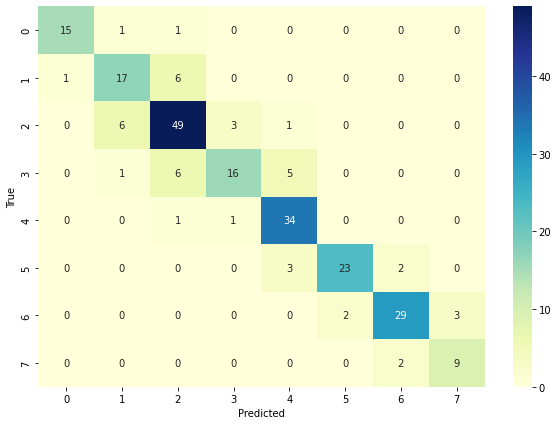

In [52]:

# Create CART Classifier
clf = DecisionTreeClassifier()

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

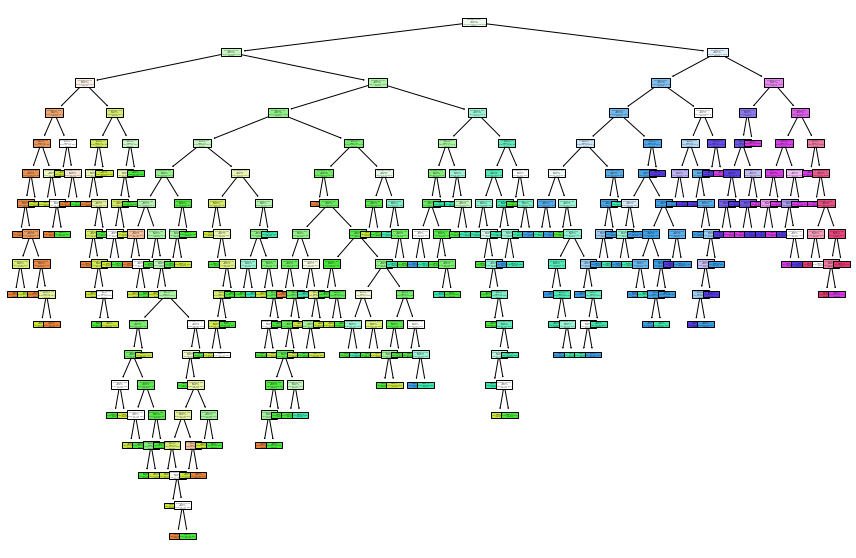

In [59]:
from sklearn import tree

# Plot the decision tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf, 
               feature_names=('CH4-2030-Mt/yr', 'CH4-2040-Mt/yr','CH4-2050-Mt/yr', 'CO2-2030Mt/yr', 'CO2-2040Mt/yr', 'CO2-2050Mt/yr'),  
               class_names=df_final.Category,
               filled=True)
plt.show()